Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [1]:
%matplotlib inline
import nsfg
import chap01soln
df = nsfg.ReadFemPreg()
resp = chap01soln.ReadFemResp()
resp.columns


Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [2]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

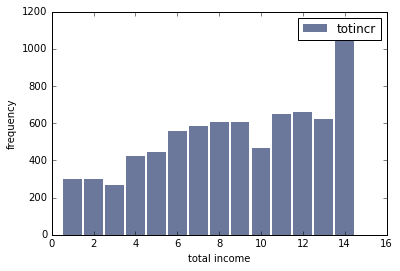

In [3]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show(xlabel='total income', ylabel='frequency')


Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

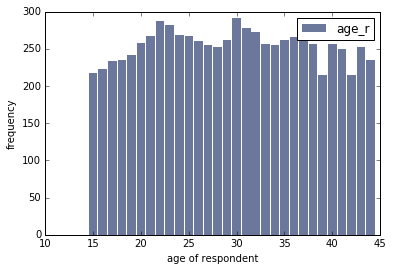

In [4]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show(xlabel='age of respondent', ylabel='frequency')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

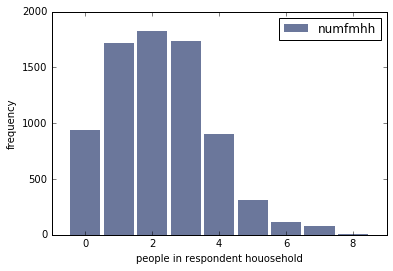

In [5]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show(xlabel='people in respondent houosehold', ylabel='frequency')
#I assume this refers to people besides the respondent? The 0 result was initially surprising.

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

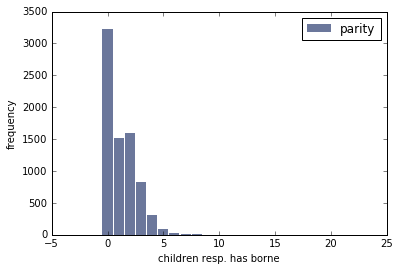

'Describe Distribution: Mode=0, Asymmetric, Tail Extends Right. It is most common that the respondent has borne no children. As the # of children born increases, frequency generally decreases, though the frequencies of 1 and 2 are about the same.'

In [6]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show(xlabel='children resp. has borne', ylabel='frequency')

"""Describe Distribution: Mode=0, Asymmetric, Tail Extends Right. It is most common that the respondent has borne no children. As the # of children born increases, frequency generally decreases, though the frequencies of 1 and 2 are about the same."""

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [7]:
print('Parity', 'Freq')
for parity, freq in hist.Largest(10):
    print(parity, freq)
#Highest Parity Value 22! - Unlikely,possible error?

('Parity', 'Freq')
(22, 1)
(16, 1)
(10, 3)
(9, 2)
(8, 8)
(7, 15)
(6, 29)
(5, 95)
(4, 309)
(3, 828)


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

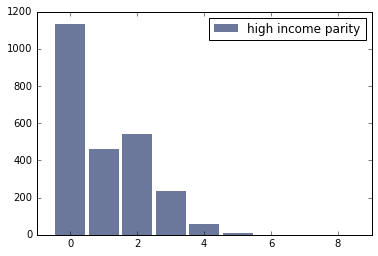

In [8]:
high = resp[resp.totincr >= 12]
others = resp[resp.totincr < 12]
high_hist = thinkstats2.Hist(high.parity)
thinkplot.Hist(high_hist, label='high income parity')
thinkplot.Show()
    

Find the largest parities for high income respondents.

In [9]:
print 'High Income (> 12)'
print 'Parity  |  Freq'
high_income_parity = resp[resp.totincr >= 12].parity
for high_income_parity, freq in hist.Largest(10):
    print (high_income_parity,freq)
    
#The highest numbers here don't seem to make sense with the graph from prev. exercise
#Not sure what is being done incorrectly

High Income (> 12)
Parity  |  Freq
(22, 1)
(16, 1)
(10, 3)
(9, 2)
(8, 8)
(7, 15)
(6, 29)
(5, 95)
(4, 309)
(3, 828)


Compare the mean <tt>parity</tt> for high income respondents and others.

In [10]:
high_income_parity = resp[resp.totincr >= 12].parity
mean_parity = resp.parity.mean()
high_income_mean_parity = high_income_parity.mean()

print 'Mean Parity = '
print mean_parity
print '  '
print 'High-Income Mean Parity ='
print high_income_mean_parity

Mean Parity = 
1.22321078111
  
High-Income Mean Parity =
1.04547316673


Investigate any other variables that look interesting.

Mean Parity Working Women= 
1.14694694695
  
Mean Parity Unemployed Women
1.3670694864
 
Working


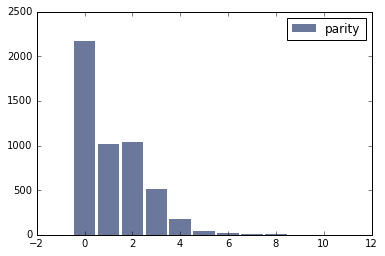

Not Employed


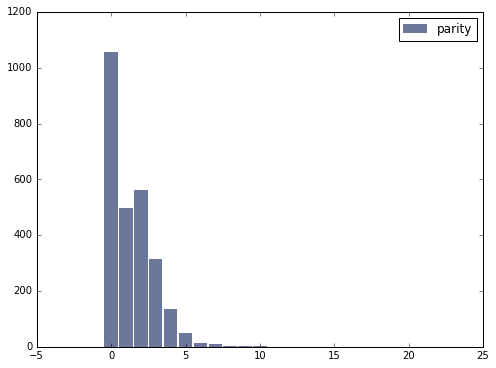

In [11]:
working_parity = resp[resp.laborfor < 5].parity
non_working_parity = resp[resp.laborfor >= 5].parity

mean_working_parity = working_parity.mean()
mean_non_working_parity = non_working_parity.mean()

print 'Mean Parity Working Women= '
print mean_working_parity
print '  '
print 'Mean Parity Unemployed Women'
print mean_non_working_parity

print ' '
print 'Working'

work_hist = thinkstats2.Hist(working_parity)
thinkplot.Hist(work_hist, label='parity')
thinkplot.Show()

print 'Not Employed'
non_work_hist = thinkstats2.Hist(non_working_parity)
thinkplot.Hist(non_work_hist, label='parity')
thinkplot.Show()
    

### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [12]:
import math
weight_firsts = df[df.parity <= 1].totalwgt_lb
weight_others = df[df.parity>1].totalwgt_lb
weight_early = df[df.prglngth <36].totalwgt_lb
weight_late = df[df.prglngth >= 36].totalwgt_lb
#working_parity = resp[resp.laborfor < 5].parity
#non_working_parity = resp[resp.laborfor >= 5].parity

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d


cohen_d_weight= CohenEffectSize(weight_firsts, weight_others)
cohen_d_length = CohenEffectSize(weight_early, weight_late)
print 'Weight difference between first babies and others:'
print cohen_d_weight

print 'Weight difference between pregnancy length groups:'
print cohen_d_length


Weight difference between first babies and others:
-0.0673362030502
Weight difference between pregnancy length groups:
-1.42196168326


In [13]:
#First babies weigh about the same as others

In [14]:
#Babies from longer pregnancies weigh more, as you might expect.